In [25]:
pip install textblob 

  Using cached https://files.pythonhosted.org/packages/60/f0/1d9bfcc8ee6b83472ec571406bd0dd51c0e6330ff1a51b2d29861d389e85/textblob-0.15.3-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import textblob 
import os

In [2]:
df = pd.DataFrame()

In [3]:
files = [fn for fn in os.listdir('.') if fn.endswith('.csv')]
for fn in files:
    df = pd.concat([df, pd.read_csv(fn)], ignore_index=True)
df.drop_duplicates(subset='tweet', keep=False, inplace=True)
df

/Users/jadilalanazi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,class,tweet
458,NaN,What does the Aramco IPO tell us about Saudi r...
459,NaN,*ARAMCO IPO WAS OVER-SUBSCRIBED WITH AGGREGATE...
460,NaN,Saudi Central Bank Governor: Saudi banking ind...
461,NaN,Saudi Aramco: What you need to know about the ...
462,NaN,History will be made tomorrow in the global pr...
463,NaN,"On the Eve of the Saudi Aramco IPO, Talk of a ..."
464,NaN,#Aramco replaced #Alibaba to top the world IPO...
465,NaN,The possible effects on KSA’s national budget ...
466,NaN,While this story calls the Aramco IPO a windfa...
467,NaN,The public sector wage bill has increased to 5...


In [4]:
len(df['tweet'].tolist())

407

In [5]:
len(set(df['tweet'].tolist()))

407

In [6]:
import re
import textblob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
def remove_urls(a_string): # 'Hi all https://twitter.com' =-> Hi All
    return re.sub(r"http\S+", "", a_string).strip()

In [8]:
def remove_punc(a_string):
    return ' '.join(re.findall('\w+', a_string))

In [9]:
def remove_repeat(a_string):
    return re.sub(r'(.)\1+', r'\1', a_string)

In [10]:
def clean(x):
    return remove_repeat(remove_punc(remove_urls(x)))

In [11]:
df['cleaned'] = df['tweet'].apply(clean)

In [12]:
df.drop_duplicates(subset='cleaned', keep=False, inplace=True)

In [13]:
pos = 0
neg = 0
nat = 0
tweets = []
classes = []
for t in df['tweet']:
    tweets.append(t)
    tb = textblob.TextBlob(t)
    if tb.polarity == 0:
        nat += 1
        classes.append('nat')
    elif tb.polarity > 0:
        pos += 1
        classes.append('pos')
    elif tb.polarity < 0:
        neg += 1
        classes.append('neg')
    print(tb.polarity)
    print('-' * 10)
df2 = pd.DataFrame({'tweet': tweets, 'class': classes})

0.0
----------
0.0
----------
0.0
----------
0.2
----------
0.1
----------
0.0
----------
0.0
----------
-0.03333333333333333
----------
0.19999999999999998
----------
-0.20833333333333334
----------
0.225
----------
0.0
----------
0.225
----------
0.0
----------
0.0
----------
0.2
----------
0.5
----------
0.13636363636363635
----------
0.0
----------
0.05
----------
0.20000000000000004
----------
0.0
----------
0.0
----------
-0.041666666666666664
----------
0.0
----------
-1.0
----------
0.0
----------
0.13999999999999999
----------
0.375
----------
0.0
----------
0.06666666666666667
----------
0.0
----------
0.43333333333333335
----------
0.5
----------
0.0
----------
0.0
----------
0.55
----------
0.0
----------
0.0
----------
0.25
----------
-0.125
----------
0.0
----------
0.5
----------
0.22857142857142856
----------
0.8
----------
0.2
----------
-0.09374999999999996
----------
0.22500000000000003
----------
-0.5
----------
0.0
----------
-0.15555555555555559
----------
0.0
---

In [14]:
print('NEG:', neg)
print('POS:', pos)
print('NAT:', nat)
print('TOTAL:', neg + pos + nat)

NEG: 32
POS: 76
NAT: 109
TOTAL: 217


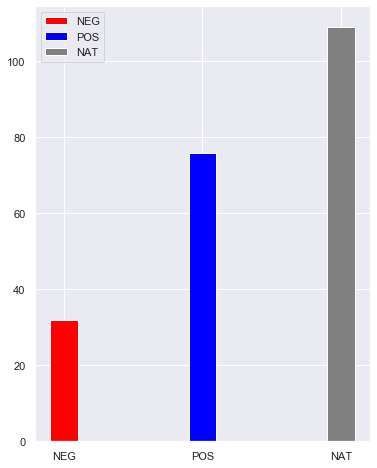

In [15]:
x = [2, 4, 6]
y = [neg, pos, nat]
colors = ['red', 'blue', 'grey']
ticks = ['NEG', 'POS', 'NAT']
i = 0
plt.figure(figsize=(6,8))
for xi, yi in zip(x, y):
    plt.bar(xi, yi, color=colors[i], label=ticks[i], width=0.4)
    i += 1
plt.xticks(x, ticks)
plt.legend()

In [16]:
df2

,tweet,class
0,*ARAMCO IPO WAS OVER-SUBSCRIBED WITH AGGREGATE...,nat
1,Saudi Central Bank Governor: Saudi banking ind...,nat
2,Saudi Aramco: What you need to know about the ...,nat
3,History will be made tomorrow in the global pr...,pos
4,#Aramco replaced #Alibaba to top the world IPO...,pos
5,The possible effects on KSA’s national budget ...,nat
6,While this story calls the Aramco IPO a windfa...,nat
7,The public sector wage bill has increased to 5...,neg
8,No Riyadh rush as many global investors steer ...,pos
9,"""Saudi Arabia still hopes to attract the forei...",neg


In [17]:
df2[df2['class']=='neg'].count()

tweet    32
class    32
dtype: int64

In [18]:
df2[df2['class']=='neg'].head(100)

,tweet,class
7,The public sector wage bill has increased to 5...,neg
9,"""Saudi Arabia still hopes to attract the forei...",neg
23,The EsadeGeo Daily Digest on \n@javiersolana\n...,neg
25,"Hey \n@Citi\n, you say you’re on “a mission of...",neg
40,Foreign Investors Get 23% Of Saudi Aramco’s In...,neg
46,Familiar script. The bad Saudi press overlaps ...,neg
48,Breakingviews - Aramco: the IPO that succeeded...,neg
50,Count down for Aramco’s IPO,neg
61,In \n@energyintel\n IOD:\n\n- #Aramco IPO Haul...,neg
62,Someone who advised Aramco on its IPO said he ...,neg


In [19]:
df2.to_csv('pos, neg.csv', index=False, encoding='utf-8-sig')
